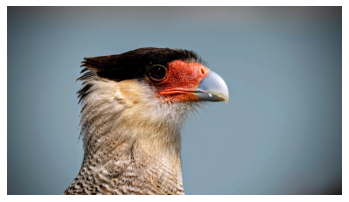

In [1]:
# https://stepup.ai/exploring_data_augmentation_keras/

import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import requests

url = 'https://github.com/dufourpascal/stepupai/raw/master/tutorials/data_augmentation/image.jpg'
r = requests.get(url, allow_redirects=True)
open('image.jpg', 'wb').write(r.content)

image = load_img('image.jpg')
image = img_to_array(image).astype(int)
data = np.expand_dims(image, 0)
plt.axis('off')
plt.imshow(data[0])

In [2]:
data_float = data.astype('float32')/255

In [3]:
def default_datagen(img_data):
  datagen = ImageDataGenerator( fill_mode='nearest', dtype=int)
  datagen.fit(img_data)
  return datagen

def plot_augmentation(datagen, img_data, n_rows=1, n_cols=5):
  n_images = n_rows * n_cols
  gen_flow = datagen.flow(img_data)

  plt.figure(figsize=(n_cols*4, n_rows*3))
  for image_index in range(n_images):
    image = next(gen_flow)
    plt.subplot(n_rows, n_cols, image_index+1)
    plt.axis('off')
    plt.imshow(image[0], vmin=0, vmax=255)

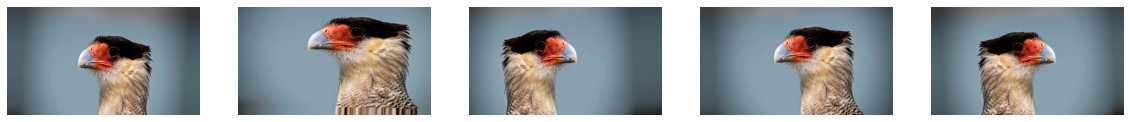

In [4]:
# Data augmentation
datagen = default_datagen(data_float)
datagen.width_shift_range = 0.1
datagen.height_shift_range = 0.1
datagen.zoom_range = [0.80, 1.2]
datagen.rotation_range = 5
datagen.horizontal_flip = True
datagen.vertical_flip = False
plot_augmentation(datagen, data_float)

In [5]:
datagen = default_datagen(data_float)
datagen.width_shift_range = 0.2
datagen.height_shift_range = 0.2

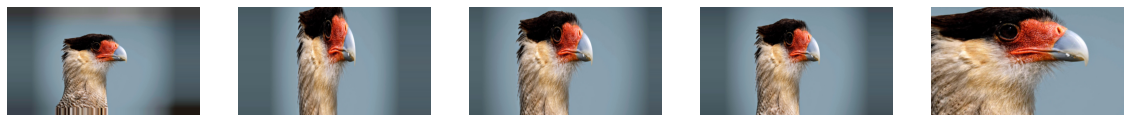

In [6]:
datagen = default_datagen(data_float)
datagen.zoom_range = [0.5, 1.5]
plot_augmentation(datagen, data_float)

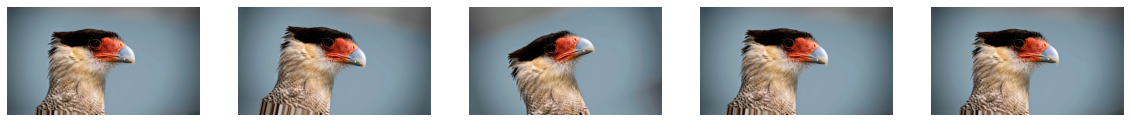

In [7]:
datagen = default_datagen(data_float)
datagen.rotation_range = 25
plot_augmentation(datagen, data_float)

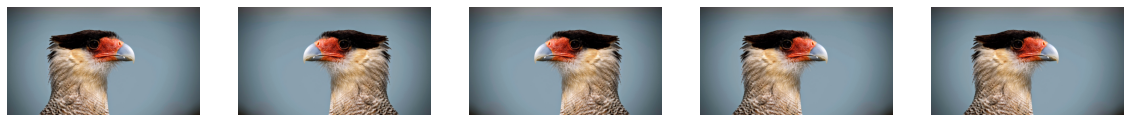

In [8]:
datagen = default_datagen(data_float)
datagen.horizontal_flip = True
datagen.vertical_flip = False
plot_augmentation(datagen, data_float)

In [10]:
def data_aug(input_data):
    input_data = np.array(input_data)
    assert len(input_data.shape) == 4
    generator = ImageDataGenerator(fill_mode='nearest', dtype=int)
    generator.width_shift_range = 0.1
    generator.height_shift_range = 0.1
    generator.zoom_range = [0.80, 1.2]
    generator.rotation_range = 5
    generator.horizontal_flip = True
    generator.vertical_flip = False
    generator.fit(input_data)
    flow = generator.flow(input_data)
    return flow

augment = data_aug(data_float)
gen = next(augment)

In [12]:
data_float.shape

(1, 450, 800, 3)

In [11]:
gen.shape

(1, 450, 800, 3)